In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Salary_Data.csv')

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


simple dataset with no nan values so feature engineering is not done

Text(0, 0.5, 'salary')

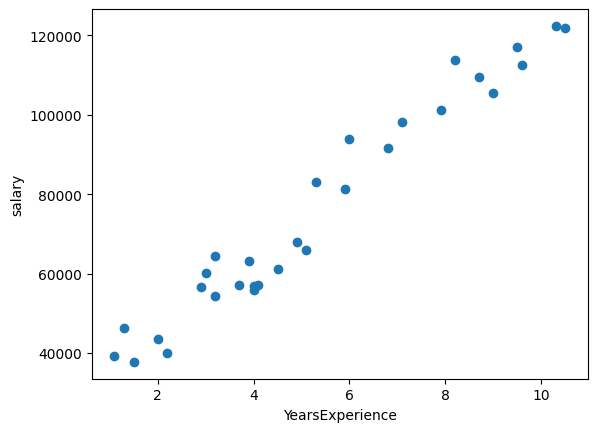

In [5]:
#scatter plot -> to check correlation
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('salary')

In [6]:
#finding correlation
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


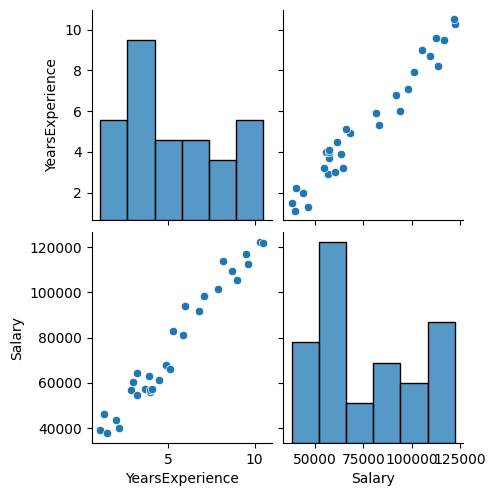

In [7]:
#seaborn for visualisation
import seaborn as sns
sns.pairplot(df)

In [37]:
#independent and dependent features
X=df[['YearsExperience']]##independent feature should be data frame (basically 2d array)
#Y=df['YearsExperience']
print(np.array(X).shape)
print(np.array(Y).shape)
#X is correct Y is not

(30, 1)
(30,)


In [38]:
#dependent
y=df['Salary'] #can have it as series. dont have to be 2d

In [39]:
np.array(y).shape

(30,)

In [40]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [41]:
X_train.shape

(22, 1)

In [42]:
y_train.shape

(22,)

In [43]:
#standardization -> aplly Z_score to all data points with mean=0 and var=1
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

For train we do fit_transform but for test we only do transform. The mean and variance values that has been used in train is used to by the test dataset too to keep the dataset consistent.
For better explanation: https://stackoverflow.com/questions/43675665/when-scale-the-data-why-the-train-dataset-use-fit-and-transform-but-the-te#:~:text=We%20use%20fit_transform()%20on,to%20scale%20the%20test%20data.

In [44]:
X_test=scaler.transform(X_test)
X_test

array([[ 1.79640106],
       [ 0.03908914],
       [ 1.27294644],
       [ 0.1886476 ],
       [-0.59653431],
       [-0.40958624],
       [ 2.05812836],
       [ 1.45989452]])

In [45]:
##apply simple linear regression
from sklearn.linear_model import LinearRegression

In [46]:
regression=LinearRegression()

In [47]:
regression.fit(X_train,y_train)

LinearRegression()

y=w0+w1x here w0 is intercept and w1 is coeff

In [48]:
print(regression.coef_)
regression.intercept_

[25063.1519945]


70416.40909090909

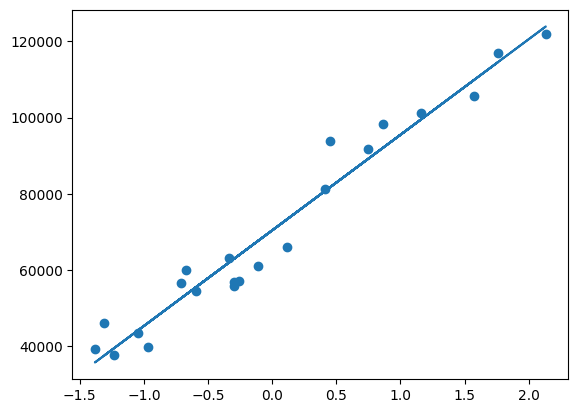

In [49]:
# plot Training data best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [50]:
#prediction for test data
y_pred=regression.predict(X_test)

In [51]:
## performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [52]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

38802588.99247064
5056.995466663591
6229.172416338356


In [54]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))


0.9347210011126782


In [64]:
##prediction for new data
np.floor(regression.predict(scaler.transform([[15]])))

C:\Users\hp\anaconda3\envs\homl3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([166043.])